# Dataset link
https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading dataset

In [336]:
train=pd.read_csv("D:\\MECS\\Internships\\Code clause\\Projects\\Data sets\\train.csv")
features=pd.read_csv("D:\\MECS\\Internships\\Code clause\\Projects\\Data sets\\features.csv")
stores=pd.read_csv("D:\\MECS\\Internships\\Code clause\\Projects\\Data sets\\stores.csv")


In [337]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [338]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [339]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Merging all features into one dataframe

In [340]:
df=train.merge(stores)
df=df.merge(features)

In [341]:
df1=df
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [342]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [343]:
df.dropna(inplace=True)

In [344]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,1,1,2011-11-11,18689.54,False,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,1,2,2011-11-11,44936.47,False,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,1,3,2011-11-11,9959.64,False,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,1,4,2011-11-11,36826.52,False,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,1,5,2011-11-11,31002.65,False,A,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [345]:
df['Date']=df['Date'].str.replace('-','')
df['Date']=df['Date'].astype(float)
df['Date']

6587      20111111.0
6588      20111111.0
6589      20111111.0
6590      20111111.0
6591      20111111.0
             ...    
421565    20121026.0
421566    20121026.0
421567    20121026.0
421568    20121026.0
421569    20121026.0
Name: Date, Length: 97056, dtype: float64

In [346]:
df.nunique()

Store              45
Dept               81
Date               48
Weekly_Sales    91332
IsHoliday           2
Type                3
Size               40
Temperature      1110
Fuel_Price        291
MarkDown1        1395
MarkDown2        1301
MarkDown3        1194
MarkDown4        1383
MarkDown5        1394
CPI               556
Unemployment      134
dtype: int64

In [347]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,97056.000000,97056.000000,9.705600e+04,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000,97056.000000
mean,20.239408,44.278746,2.011871e+07,17857.195155,155229.302980,57.348331,3.618946,8841.260245,3693.532392,1816.629491,4025.923108,5310.830581,174.766754,7.414578
std,12.037946,30.119460,3.701188e+03,24732.104674,51201.162733,18.263734,0.280003,9258.091154,10058.901796,10989.284083,7173.060535,6535.397883,39.652638,1.708319
min,1.000000,1.000000,2.011111e+07,-1699.000000,34875.000000,7.460000,3.031000,32.500000,-265.760000,-29.100000,0.460000,170.640000,129.816710,4.077000
25%,10.000000,19.000000,2.012012e+07,2763.892500,119557.000000,42.750000,3.413000,3600.790000,47.550000,5.400000,605.880000,2383.670000,136.856419,6.392000
50%,20.000000,37.000000,2.012033e+07,8622.160000,155083.000000,57.950000,3.630000,6264.180000,192.000000,30.460000,1739.830000,3864.600000,189.194056,7.280000
75%,29.000000,72.000000,2.012072e+07,22740.542500,203742.000000,72.660000,3.820000,10333.240000,2551.320000,123.420000,4082.990000,6197.530000,219.355063,8.256000
max,45.000000,99.000000,2.012103e+07,630999.190000,219622.000000,95.910000,4.301000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.036936,12.890000


In [348]:
nums=df.select_dtypes(include='number')

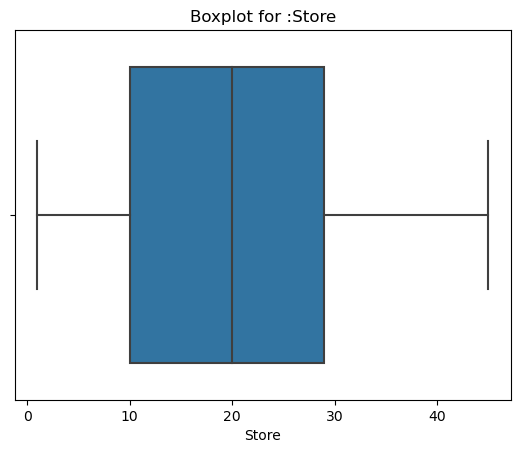

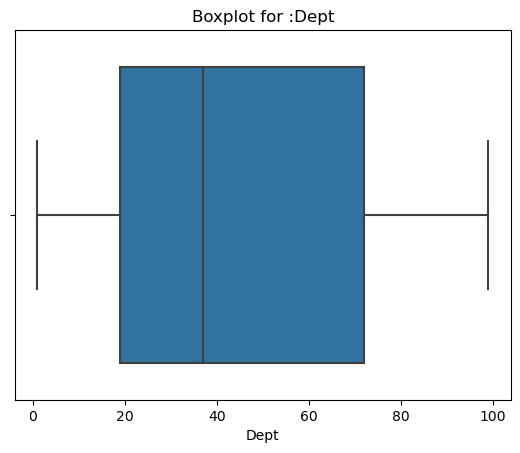

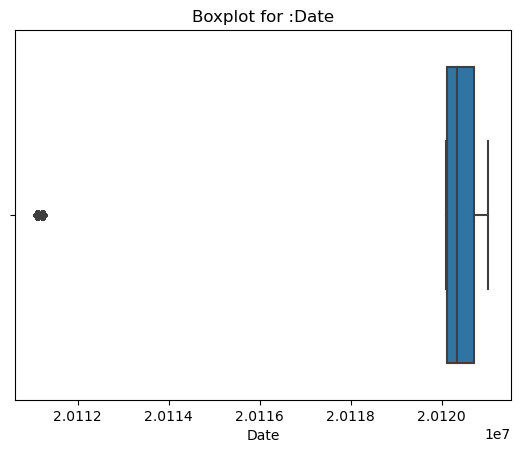

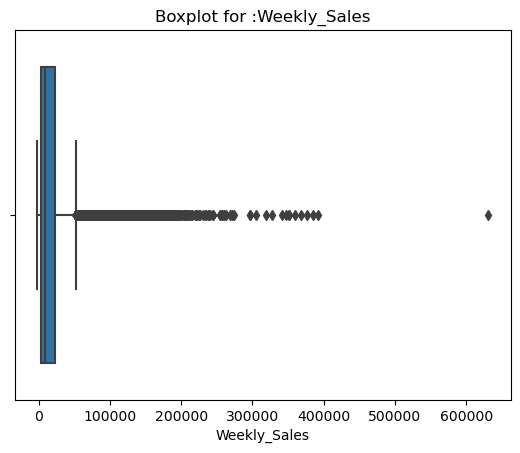

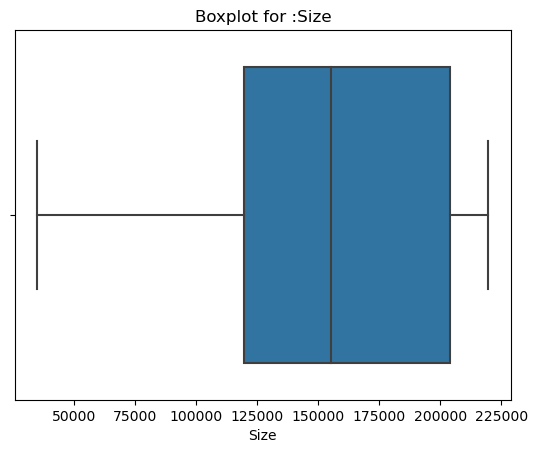

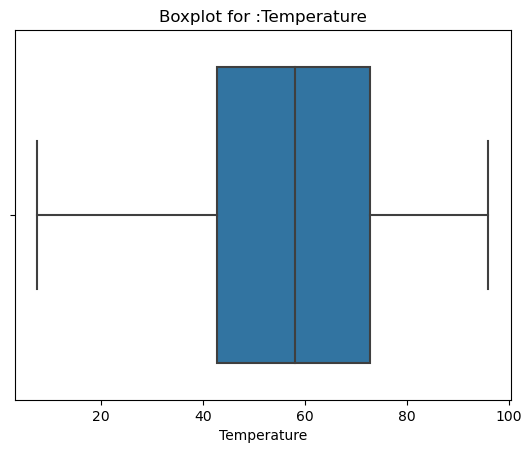

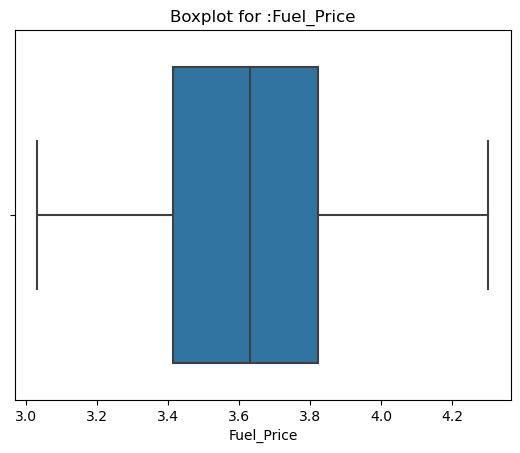

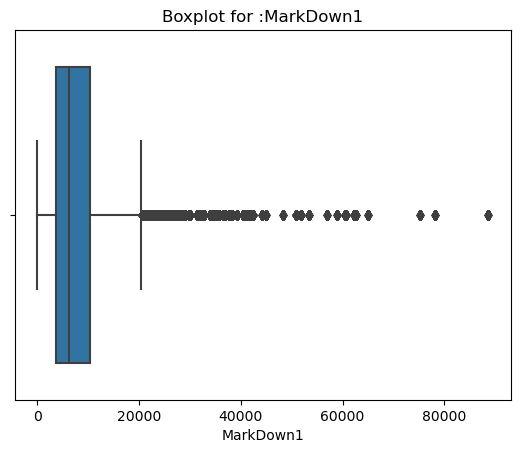

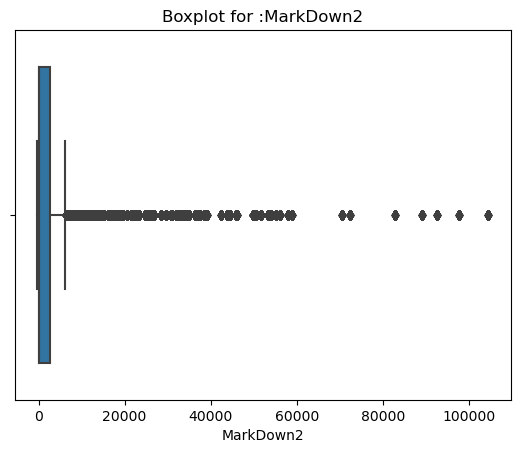

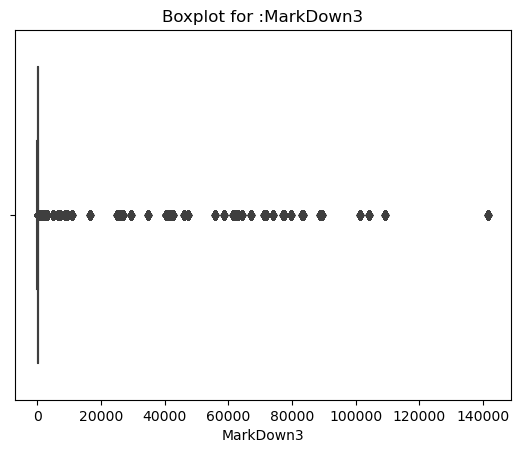

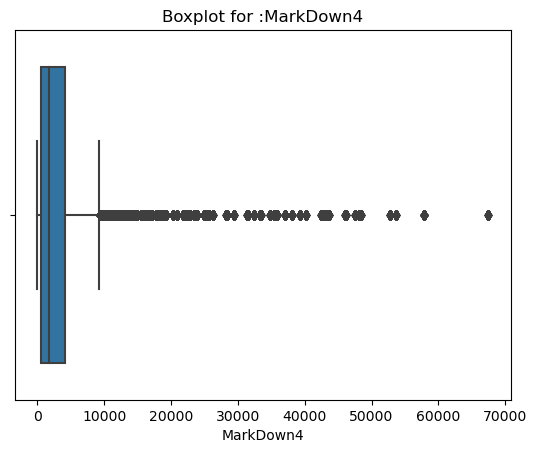

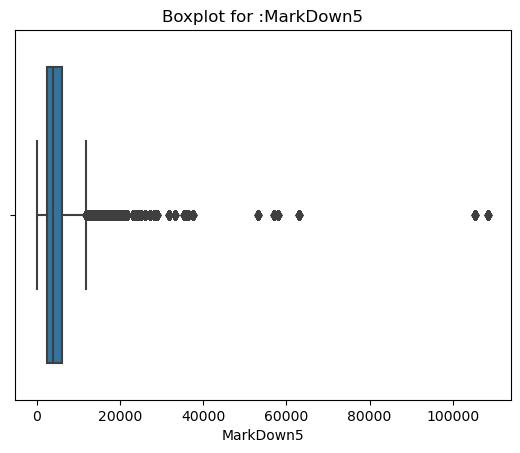

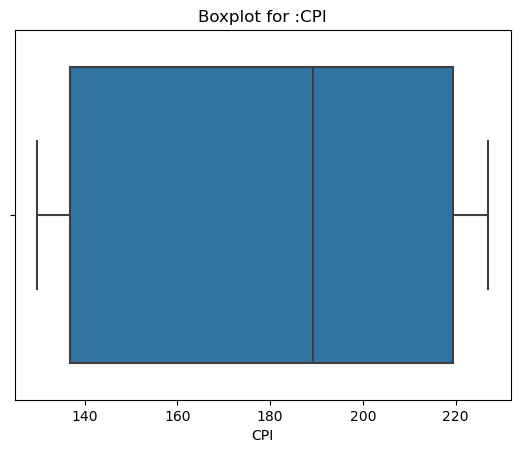

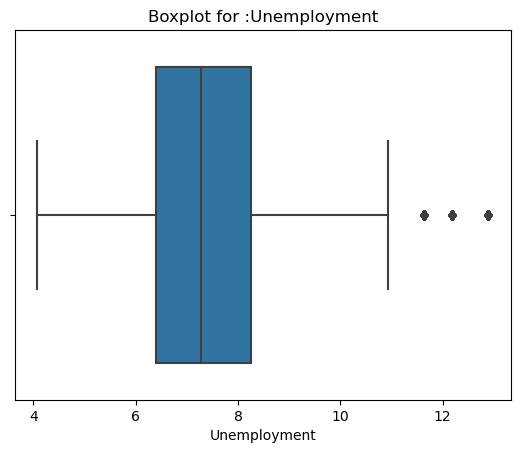

In [349]:
for i in nums.columns:
    sns.boxplot(x=nums[i]) #for plotting boxplot of each attribute
    plt.title("Boxplot for :"  +i) #for giving name of the boxplot
    plt.show() #for showing the plot

## Removing outliers

In [350]:
for it in nums.columns:  
  Q1=nums[it].quantile(0.25) #25% quantile of the attribute
  Q3=nums[it].quantile(0.75) #75% quantile of the attribute
  IQR=Q3 - Q1 #interquartile range(difference of q1 and q3)
  lower_bound=Q1 - 1.5 * IQR #lower bound of the attribute
  upper_bound=Q3 + 1.5 * IQR #upper bound of the attribute


  lst=[] #list to store the non outliers
  for i in nums[it]: #checking all values in attribute
      if  (i>upper_bound):
            lst.append(upper_bound) #if number greater than upperbound then append previous upper bound
      elif (i<lower_bound):
          lst.append(lower_bound) #if number less than lower bound then append previous lower bound
      else:
          lst.append(i) # if number is between upper and lower append into list

  nums[it]=lst #update the column with non outliers

In [351]:
nums.skew(axis = 0)

Store           0.234642
Dept            0.374902
Date           -0.872691
Weekly_Sales    1.166877
Size           -0.627293
Temperature    -0.118864
Fuel_Price      0.004420
MarkDown1       0.973890
MarkDown2       1.247880
MarkDown3       1.177278
MarkDown4       1.146515
MarkDown5       0.956539
CPI             0.076962
Unemployment    0.179202
dtype: float64

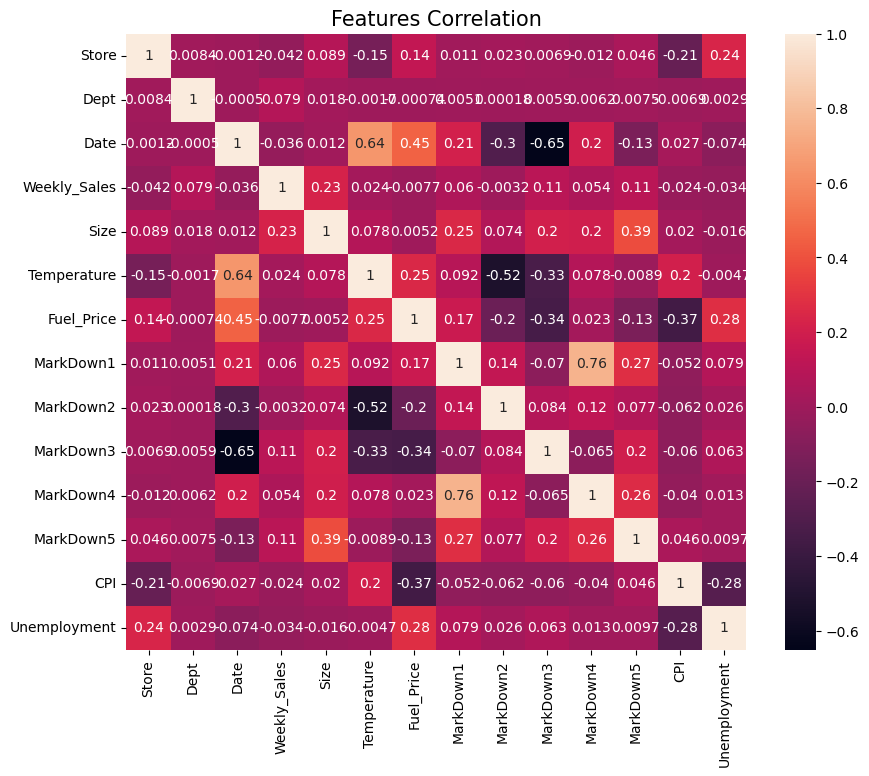

In [352]:
plt.figure(figsize=(10,8))
corr = nums.corr()
sns.heatmap(corr, annot=True)
plt.title("Features Correlation", fontsize = 15)
plt.show()

In [353]:
nums.drop(columns=['MarkDown1'],inplace=True)

# Encoding the categorical attributes

In [354]:
cat=df.select_dtypes(exclude='number')

In [355]:
cat['IsHoliday']=cat['IsHoliday'].astype(str)
cat

,IsHoliday,Type
6587,False,A
6588,False,A
6589,False,A
6590,False,A
6591,False,A
...,...,...
421565,False,B
421566,False,B
421567,False,B
421568,False,B


In [356]:
from sklearn import preprocessing
ordi = preprocessing.OrdinalEncoder()
new_cat = pd.DataFrame(ordi.fit_transform(cat),columns=['IsHoliday','Type'],index=cat.index)
new_cat

,IsHoliday,Type
6587,0.0,0.0
6588,0.0,0.0
6589,0.0,0.0
6590,0.0,0.0
6591,0.0,0.0
...,...,...
421565,0.0,1.0
421566,0.0,1.0
421567,0.0,1.0
421568,0.0,1.0


In [357]:
import pickle
pickle.dump(ordi,open('encoder.pkl','wb'))

# Standardizing numerical attributes

In [358]:
nums.drop(columns=['Weekly_Sales'],inplace=True)

In [359]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_num= pd.DataFrame(scaler.fit_transform(nums), 
                                    columns = nums.columns, 
                                    index = nums.index)

In [360]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [361]:
new_df=pd.concat([new_cat,std_num,df['Weekly_Sales']],axis=1,ignore_index=False)

In [362]:
new_df

,IsHoliday,Type,Store,Dept,Date,Size,Temperature,Fuel_Price,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
6587,0.0,0.0,-1.598238,-1.436911,-1.835484,-0.076450,0.096458,-1.14980,1.923564,1.241371,-0.159663,0.643111,1.090257,0.315153,18689.54
6588,0.0,0.0,-1.598238,-1.403709,-1.835484,-0.076450,0.096458,-1.14980,1.923564,1.241371,-0.159663,0.643111,1.090257,0.315153,44936.47
6589,0.0,0.0,-1.598238,-1.370508,-1.835484,-0.076450,0.096458,-1.14980,1.923564,1.241371,-0.159663,0.643111,1.090257,0.315153,9959.64
6590,0.0,0.0,-1.598238,-1.337307,-1.835484,-0.076450,0.096458,-1.14980,1.923564,1.241371,-0.159663,0.643111,1.090257,0.315153,36826.52
6591,0.0,0.0,-1.598238,-1.304105,-1.835484,-0.076450,0.096458,-1.14980,1.923564,1.241371,-0.159663,0.643111,1.090257,0.315153,31002.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0.0,1.0,2.056889,1.617609,1.319922,-0.722806,0.082222,0.93947,-0.646833,0.151128,-0.902790,-1.271488,0.442398,0.821139,2487.80
421566,0.0,1.0,2.056889,1.650810,1.319922,-0.722806,0.082222,0.93947,-0.646833,0.151128,-0.902790,-1.271488,0.442398,0.821139,5203.31
421567,0.0,1.0,2.056889,1.684011,1.319922,-0.722806,0.082222,0.93947,-0.646833,0.151128,-0.902790,-1.271488,0.442398,0.821139,56017.47
421568,0.0,1.0,2.056889,1.750414,1.319922,-0.722806,0.082222,0.93947,-0.646833,0.151128,-0.902790,-1.271488,0.442398,0.821139,6817.48


In [363]:
new_df['Type'].unique()

array([0., 1., 2.])

## Data Splitting

In [364]:
x=new_df.drop(columns=['Weekly_Sales'])
y=new_df['Weekly_Sales']

## Splitting for train and test

In [365]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

# Modeling

### Linear, Lasso, Ridge Regression

In [366]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
regressor = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
regressor.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = regressor.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [367]:
from sklearn import metrics

print("Model\t\t\t RMSE \t\t\t MSE \t\tMAE \t\t MAPE \t\t\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),metrics.mean_squared_error(y_test, y_pred_lr),metrics.mean_absolute_error(y_test, y_pred_lr),metrics.mean_absolute_percentage_error(y_test, y_pred_lr),metrics.r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),metrics.mean_squared_error(y_test, y_pred_lasso),metrics.mean_absolute_error(y_test, y_pred_lasso),metrics.mean_absolute_percentage_error(y_test, y_pred_lasso), metrics.r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),metrics.mean_squared_error(y_test, y_pred_ridge),metrics.mean_absolute_error(y_test, y_pred_ridge),metrics.mean_absolute_percentage_error(y_test, y_pred_ridge), metrics.r2_score(y_test, y_pred_ridge)))

Model			 RMSE 			 MSE 		MAE 		 MAPE 				 R2
LinearRegression 	 23635.19 		 558622261.70 	16111.20 	9717668661972980.00 		0.08
LassoRegression 	 23635.07 		 558616706.75 	16111.05 	9718335031250986.00 		0.08
RidgeRegression 	 23635.19 		 558622179.36 	16111.19 	9717677453816530.00 		0.08


### KNN Regressor

In [301]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor()
regressor_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [302]:
y_test_pred = regressor_knn.predict(X_test)

In [303]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
#showing only 5 rows
temp_df.head()

,Actual,Predicted
76854,12816.04,10593.284
26508,29.70,4058.848
65749,22492.00,19775.524
6837,2450.12,5873.574
8267,5047.11,9106.810


In [304]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print("R-Square is",metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  14478.255574875207
Mean Squared Error:  564496351.8835226
Root Mean Squared Error:  23759.13196822482
Mean Absolute percentage Error:  1336.2267864375947
R-Square is 0.21588891261205623


### Decision Tree Regressor

In [305]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [306]:
y_test_pred = regressor_dt.predict(X_test)

In [307]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
#showing only 5 tuples
temp_df.head()

,Actual,Predicted
76854,12816.04,11504.81
26508,29.70,17.82
65749,22492.00,23804.95
6837,2450.12,3532.72
8267,5047.11,3853.81


In [308]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Mean Absolute percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print("R-Square is",metrics.r2_score(y_test,y_test_pred))

Mean Absolute Error:  2955.873513588464
Mean Squared Error:  54475981.54164306
Root Mean Squared Error:  7380.784615584109
Mean Absolute percentage Error:  20.04748188102222
R-Square is 0.9243303858729682


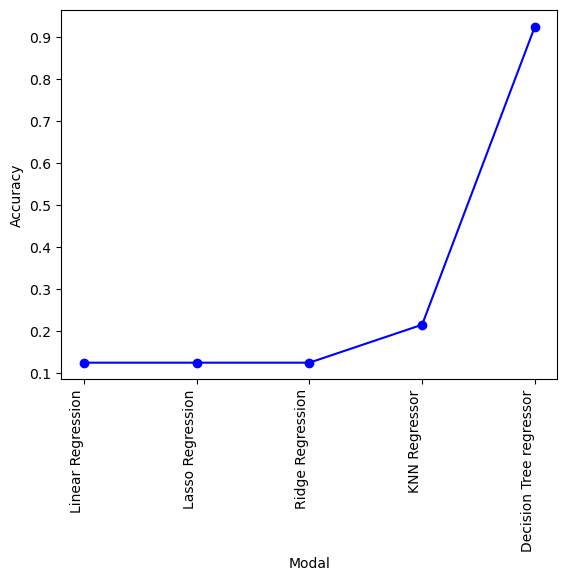

In [309]:
models = [regressor, lasso, ridge, regressor_knn, regressor_dt]#storing all models in the list
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "KNN Regressor","Decision Tree regressor"]#storing models names in the list
r2 = []#list to store the r2scores

for model in models:
    r2.append( (metrics.r2_score(y_test, model.predict(X_test)))) # append into the r2 values list

plt.plot(names,r2,'b-o',label='Accuracy over Different models');#plotting r2 with the line graph
plt.xticks(rotation=90,ha='right')#marking xticks with the model names
plt.xlabel('Modal')#labelling x axis
plt.ylabel('Accuracy')#labelling y axis

plt.show()#for showing the plot

## Decision tree Regressor is the best model fitted for the dataset with 0.90 R2 error

# Pickeling the model

In [310]:
pickle.dump(regressor_dt,open('regmodel.pkl','wb'))

In [311]:
model=pickle.load(open('regmodel.pkl','rb'))

In [312]:
pred=X_test.head(1)

In [313]:
model.predict(pred)

array([11504.81])

In [314]:
y_test.head(1)

76854    12816.04
Name: Weekly_Sales, dtype: float64